## <p style="background-color:#18ffff; font-family:newtimeroman; color:#black; font-size:150%; text-align:center; border-radius:10px 10px;">POLICE KILLING US - SEABORN VISUALiZATION TASK</p>

Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.

Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. Its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them.

## <p style="background-color:#18ffff; font-family:newtimeroman; color:black; font-size:150%; text-align:center; border-radius:10px 10px;">ABOUT THE DATASET & CONTEXT</p>

"In 2015, The Washington Post began to log every fatal shooting by an on-duty police officer in the United States. In that time there have been more than 5,000 such shootings recorded by The Post. After Michael Brown, an unarmed Black man, was killed in 2014 by police in Ferguson, Mo., a Post investigation found that the FBI undercounted fatal police shootings by more than half. This is because reporting by police departments is voluntary and many departments fail to do so. The Washington Post’s data relies primarily on news accounts, social media postings and police reports. Analysis of more than five years of data reveals that the number and circumstances of fatal shootings and the overall demographics of the victims have remained relatively constant..." 

This dataset has been prepared by The Washington Post (they keep updating it on runtime) with every fatal shooting in the United States by a police officer in the line of duty since Jan. 1, 2015.

## <p style="background-color:#18ffff; font-family:newtimeroman; color:black; font-size:150%; text-align:center; border-radius:10px 10px;">ABOUT THE FEATURES</p>

The file fatal-police-shootings-data.csv contains data about each fatal shooting in CSV format. The file can be downloaded at this URL. Each row has the following variables:

- **id:** a unique identifier for each victim
- **name:** the name of the victim
- **date:** the date of the fatal shooting in YYYY-MM-DD format
- **manner_of_death:** shot, shot and Tasered
- **armed:** indicates that the victim was armed with some sort of implement that a police officer believed could inflict harm
    - undetermined: it is not known whether or not the victim had a weapon
    - unknown: the victim was armed, but it is not known what the object was
    - unarmed: the victim was not armed
- **age:** the age of the victim
- **gender:** the gender of the victim. The Post identifies victims by the gender they identify with if reports indicate that it differs from their biological sex.
    - M: Male
    - F: Female
    - None: unknown
- **race:**
    - W: White, non-Hispanic
    - B: Black, non-Hispanic
    - A: Asian
    - N: Native American
    - H: Hispanic
    - O: Other
    - None: unknown
- **city:** the municipality where the fatal shooting took place. Note that in some cases this field may contain a county name if a more specific municipality is unavailable or unknown.
- **state:** two-letter postal code abbreviation
- **signs of mental illness:** News reports have indicated the victim had a history of mental health issues, expressed suicidal intentions or was experiencing mental distress at the time of the shooting.
- **threat_level:** The threat_level column was used to flag incidents for the story by Amy Brittain in October 2015. As described in the story, the general criteria for the attack label was that there was the most direct and immediate threat to life. That would include incidents where officers or others were shot at, threatened with a gun, attacked with other weapons or physical force, etc. The attack category is meant to flag the highest level of threat. The other and undetermined categories represent all remaining cases. Other includes many incidents where officers or others faced significant threats.
- **flee:** News reports have indicated the victim was moving away from officers
    - Foot
    - Car
    - Not fleeing

The threat column and the fleeing column are not necessarily related. For example, there is an incident in which the suspect is fleeing and at the same time turns to fire at gun at the officer. Also, attacks represent a status immediately before fatal shots by police while fleeing could begin slightly earlier and involve a chase.
- **body_camera:** News reports have indicated an officer was wearing a body camera and it may have recorded some portion of the incident.

## <p style="background-color:#18ffff; font-family:newtimeroman; color:black; font-size:150%; text-align:center; border-radius:10px 10px;">IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK</p>


In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

## <p style="background-color:#18ffff; font-family:newtimeroman; color:black; font-size:150%; text-align:center; border-radius:10px 10px;">TASKS IN THE ASSIGNMENT</p>

**In this assignment you're required to handle with the following tasks:** 

- **Task 1.** Using Box and Swarm Plots, plotting Age by Gender in terms of "Manner of Death" column of dataframe named as "kill"<br>
- **Task 2.** Plotting most dangerous cities<br>
- **Task 3.** Plotting most dangerous states<br>
- **Task 4.** Plotting the killed people having mental ilness or not<br>
- **Task 5.** Plotting threat types<br>
- **Task 6.** Plotting flee types<br>

**Now Let us first try to load and read the PoliceKillingsUS dataset.**

In [2]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

Always take a note of your dataset, and choose encoding accordingly, or else you might not be able to properly decode dataset into a Pandas DataFrame. Few of the common options include "utf-8", "utf-16", "latin-1", "iso-8859-1", "iso-8859-15" & "cp1252". Also ensure to mention complete PATH to your dataset, if it isn't in the same local directory as your IDE (Jupyter Notebook, for instance). 

**the most viable formats in which files tend to be encoded are mostly either of these:**
- encoding="utf8"
- encoding="utf16"
- encoding="windows-1251"
- encoding="windows-1252"
- encoding='latin1' (also known as ISO-885901)
- encoding='iso-8859-1' or 
- encoding='cp1252'

In [3]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [4]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [5]:
kill.sample(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2416,2680,Matthew Colton Stover,19/06/17,shot,gun,21.0,M,N,Fairbanks,AK,True,attack,Foot,False
88,127,Markell Atkins,04/02/15,shot,knife,36.0,M,B,Memphis,TN,False,other,Not fleeing,False
1733,1945,Joseph S. Schroeder,07/10/16,shot,knife,36.0,M,W,Fort Wayne,IN,False,other,Not fleeing,False
2277,2536,Jason Thomas Christian,26/04/17,shot,vehicle,32.0,M,W,Columbus,OH,False,other,Car,False
1536,1726,Austin Jerry Lee Howard,23/07/16,shot,knife,49.0,M,B,Milwaukee,WI,False,attack,Not fleeing,False


In [6]:
kill.shape

(2535, 14)

In [7]:
kill.dropna(inplace=True)

In [8]:
kill.shape

(2254, 14)

## <p style="background-color:#18ffff; font-family:newtimeroman; color:black; font-size:150%; text-align:center; border-radius:10px 10px;">Q1 - PLOT AGE BY GENDER IN TERMS OF MANNER OF DEATH</p>

In [9]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [10]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

### <p style="background-color:#18ffff; font-family:newtimeroman; color:black; font-size:150%; text-align:left; border-radius:10px 10px;">1.1 Box plot of age in both genders separeted by manner of death.</p>

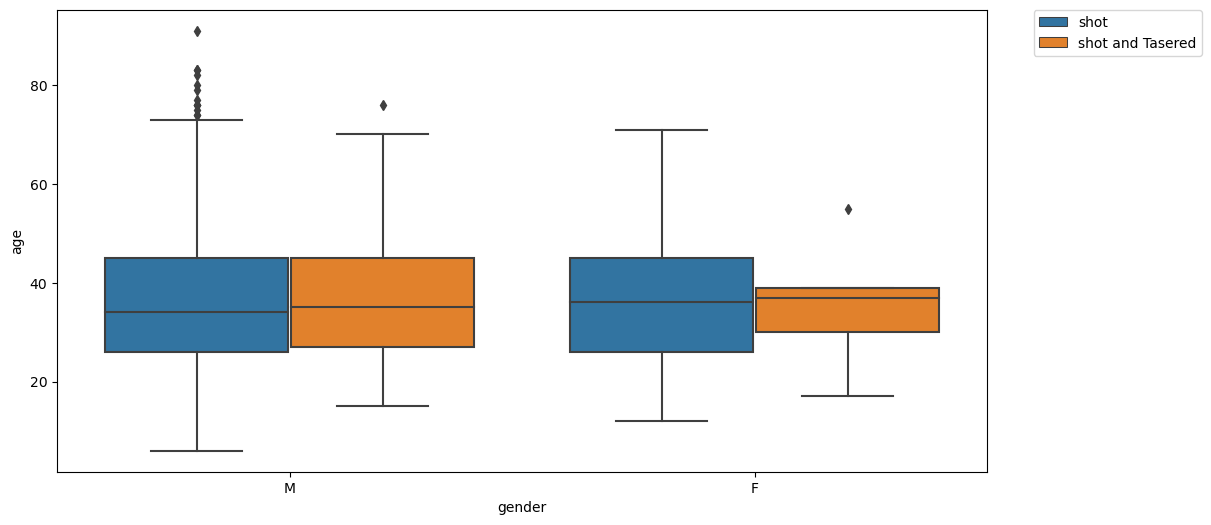

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x = "gender", y = "age", hue = "manner_of_death", data=kill)
plt.legend(bbox_to_anchor = (1.05, 1), loc = "upper left", borderaxespad = 0);

### <p style="background-color:#18ffff; font-family:newtimeroman; color:black; font-size:150%; text-align:left; border-radius:10px 10px;">1.2 Swarm Plot of age in both genders separeted by manner of death.</p>

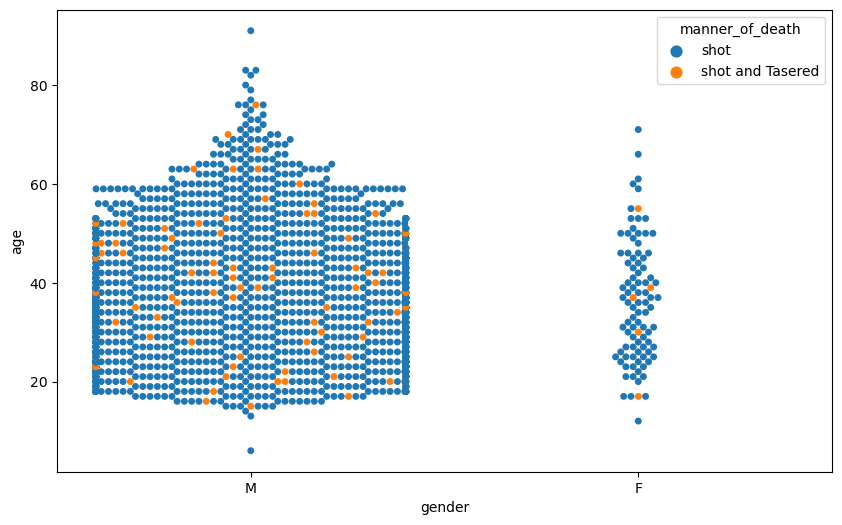

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.swarmplot(x = "gender", y = "age", hue = "manner_of_death", data=kill);

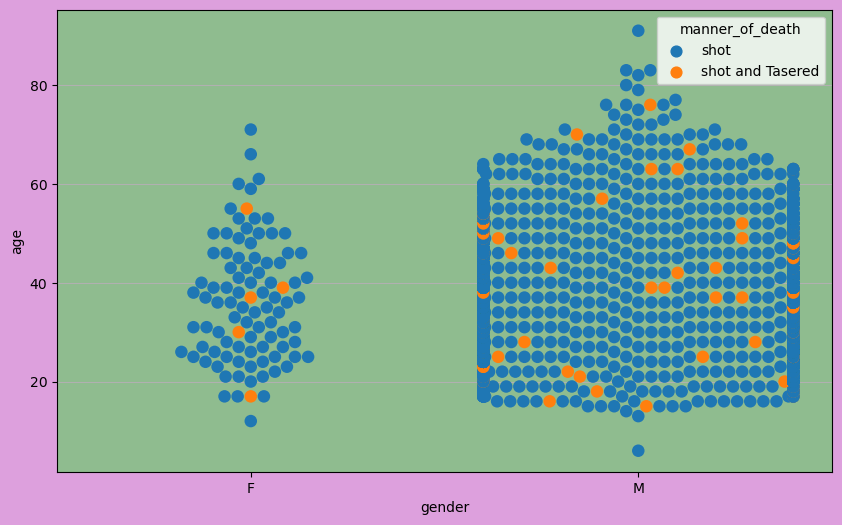

In [13]:
fig, ax = plt.subplots(figsize=(10,6))

sns.swarmplot(x = "gender", y = "age", 
              hue = "manner_of_death", 
              data=kill,
             order = ["F", "M"],    # attention!
             size = 9)

ax.yaxis.grid(True)

ax.set(facecolor = "darkseagreen")
fig.set_facecolor("plum");

## Bonus:

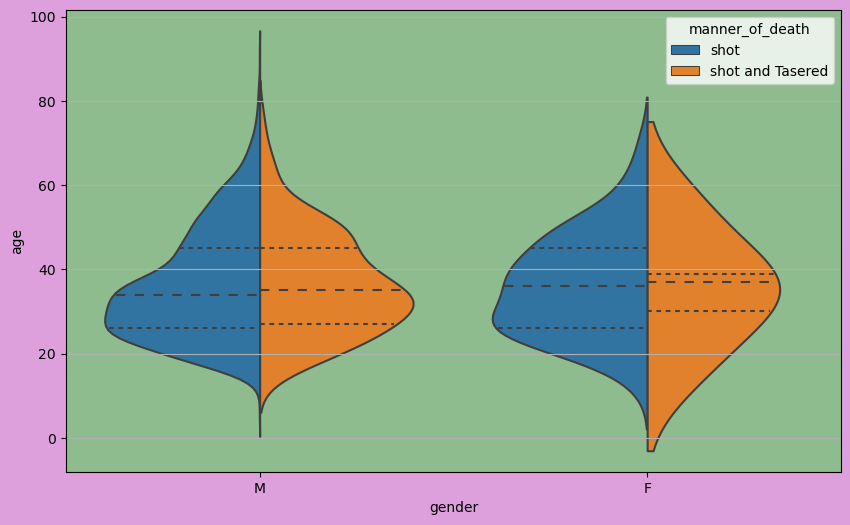

In [14]:
fig, ax = plt.subplots(figsize=(10,6))

sns.violinplot(x = "gender", y = "age", 
              hue = "manner_of_death", 
              data=kill,
              inner = "quartile",  # if you want to see quartiles
              split=True)

ax.yaxis.grid(True)

ax.set(facecolor = "darkseagreen")
fig.set_facecolor("plum");

**if you want to see mean, median and mode values of "age" feature by "gender":**

In [15]:
Means = kill.groupby('gender')['age'].mean()
Medians = kill.groupby('gender')['age'].median()
Modes = kill.groupby('gender')['age'].apply(lambda x: pd.Series.mode(x)[0]) 

print("means", Means, sep ="/", end = "\n\n")
print("medians", Medians, sep ="/", end = "\n\n")
print("modes", Modes, sep ="/", end = "\n\n")

means/gender
F    36.202128
M    36.256481
Name: age, dtype: float64

medians/gender
F    36.0
M    34.0
Name: age, dtype: float64

modes/gender
F    25.0
M    25.0
Name: age, dtype: float64



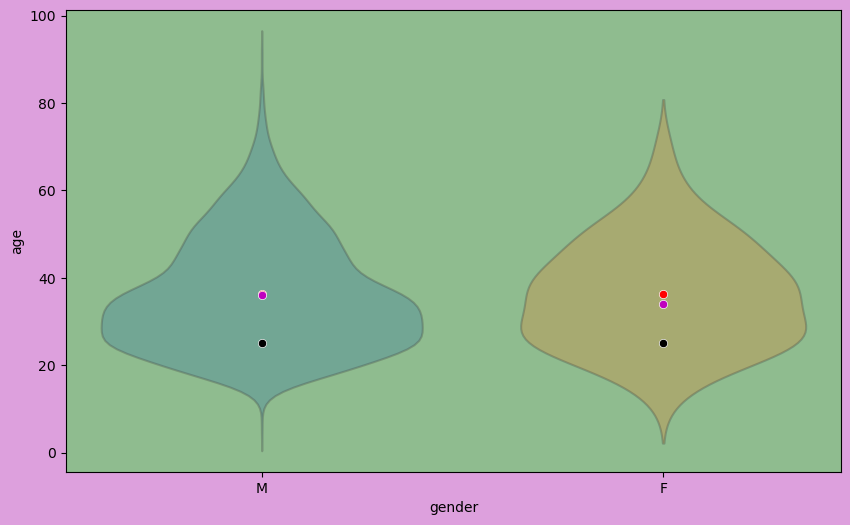

In [16]:
fig, ax = plt.subplots(figsize=(10,6))

sns.violinplot(x = "gender", y = "age", 
              data=kill,
             inner = None)

plt.setp(ax.collections, alpha = .3)

sns.scatterplot(x = range(len(Means)), y = Means, color = "r")
sns.scatterplot(x = range(len(Medians)), y = Medians, color = "m")
sns.scatterplot(x = range(len(Modes)), y = Modes, color = "black")

ax.set(facecolor = "darkseagreen")
fig.set_facecolor("plum");

## <p style="background-color:#18ffff; font-family:newtimeroman; color:black; font-size:150%; text-align:center; border-radius:10px 10px;">Q2 - PLOT 12 MOST DANGEROUS CITIES</p>

In [17]:
city_freq = kill["city"].value_counts()[:12]
city_freq

Los Angeles     35
Phoenix         28
Houston         24
Chicago         22
Austin          18
Las Vegas       17
Columbus        16
Miami           15
San Antonio     15
Indianapolis    14
St. Louis       14
Bakersfield     13
Name: city, dtype: int64

In [18]:
city_freq.index

Index(['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Austin', 'Las Vegas',
       'Columbus', 'Miami', 'San Antonio', 'Indianapolis', 'St. Louis',
       'Bakersfield'],
      dtype='object')

In [19]:
city_freq.values

array([35, 28, 24, 22, 18, 17, 16, 15, 15, 14, 14, 13], dtype=int64)

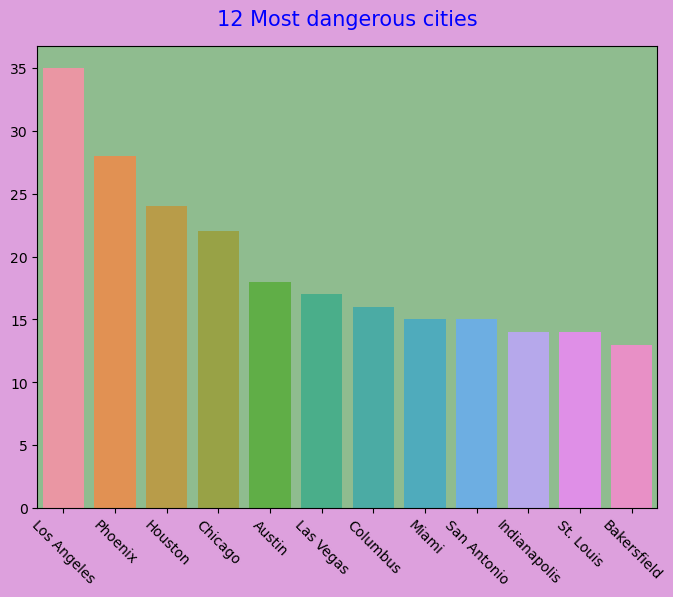

In [20]:
# with barplot:

fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(x = city_freq.index, y = city_freq.values)

ax.set_xticklabels(city_freq.index, rotation = -45)
ax.set_title("12 Most dangerous cities",
            color= "blue",
            fontsize = 15,
            pad = 15)

ax.set(facecolor = "darkseagreen")
fig.set_facecolor("plum");

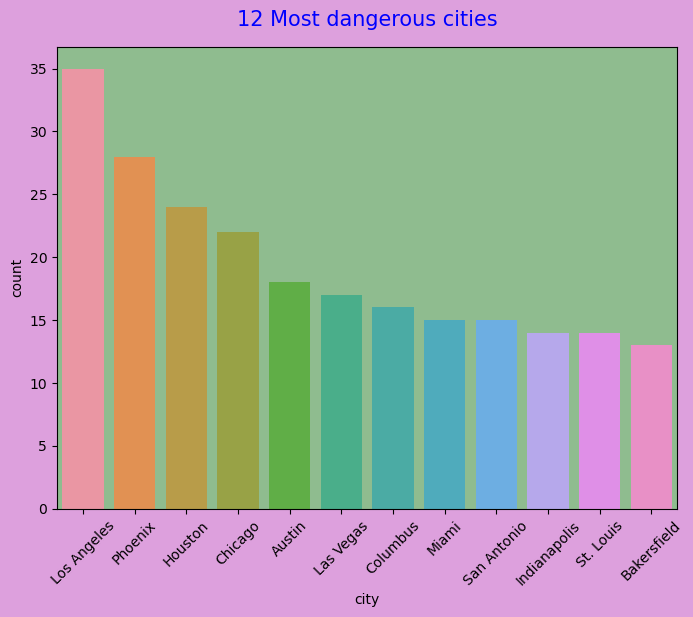

In [21]:
# with countplot:

fig, ax = plt.subplots(figsize=(8,6))

sns.countplot(x = "city", data = kill, order = city_freq.index)

ax.set_xticklabels(city_freq.index, rotation = 45)
ax.set_title("12 Most dangerous cities",
            color= "blue",
            fontsize = 15,
            pad = 15)

ax.set(facecolor = "darkseagreen")
fig.set_facecolor("plum");

## <p style="background-color:#18ffff; font-family:newtimeroman; color:black; font-size:150%; text-align:center; border-radius:10px 10px;">Q3 - PLOT 20 MOST DANGEROUS STATES</p>

In [22]:
ds = kill.state.value_counts()[:20]
ds

CA    366
TX    200
FL    136
AZ    105
OH     70
NC     66
OK     65
CO     63
GA     61
MO     58
TN     56
IL     56
WA     51
LA     47
AL     45
PA     45
NY     43
VA     43
WI     42
NM     41
Name: state, dtype: int64

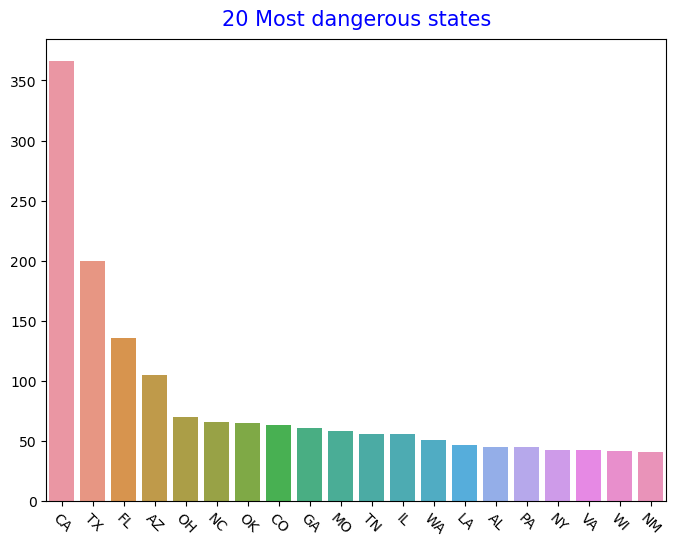

In [23]:
# with barplot:

fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(x = ds.index, y = ds.values)

ax.set_xticklabels(ds.index, rotation = -45)
ax.set_title("20 Most dangerous states",
            color= "blue",
            fontsize = 15,
            pad = 10);

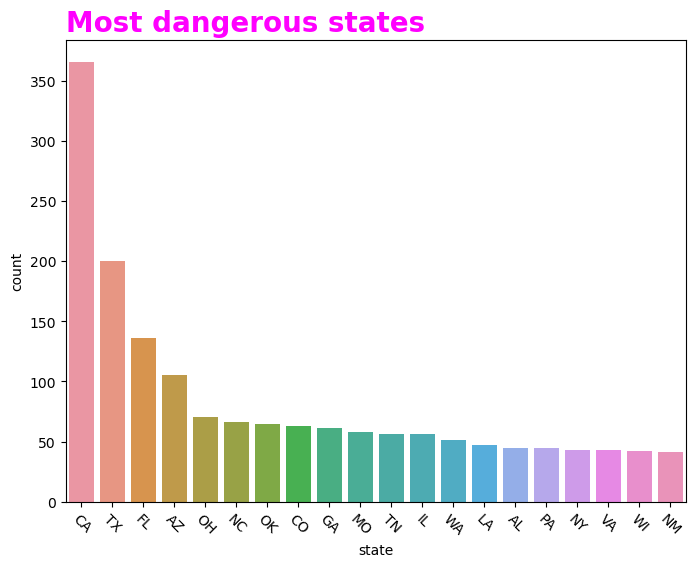

In [24]:
# with countplot:

fig, ax = plt.subplots(figsize=(8,6))

sns.countplot(x = "state", data =kill, order = ds.index)

ax.set_xticklabels(ds.index, rotation = -45)

ax.set_title("Most dangerous states",
#             color= "blue",
#             fontsize = 15,
             loc = "left",
             fontdict = {"fontsize" : 20,
                        "fontweight" : "bold",
                        "color" : "magenta"});

## <p style="background-color:#18ffff; font-family:newtimeroman; color:black; font-size:150%; text-align:center; border-radius:10px 10px;">Q4 - PLOT THE KILLED PEOPLE HAVING MENTAL-ILLNESS OR NOT</p>

In [25]:
illness = kill["signs_of_mental_illness"].value_counts()
illness

False    1681
True      573
Name: signs_of_mental_illness, dtype: int64

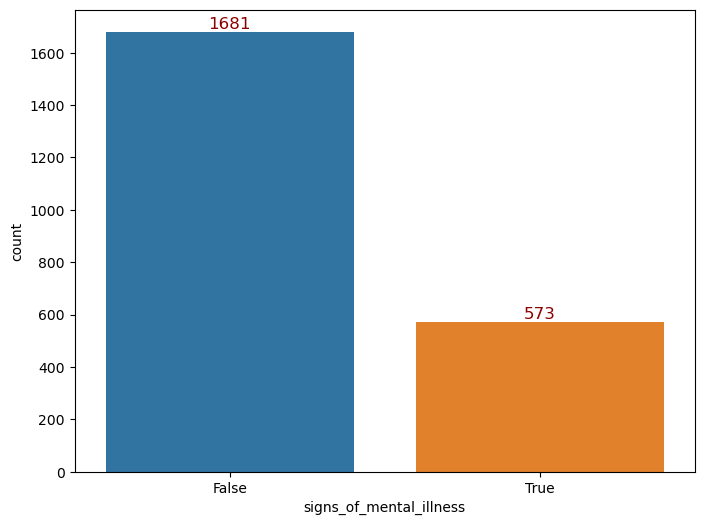

In [26]:
fig, ax = plt.subplots(figsize=(8,6))

sns.countplot(kill.signs_of_mental_illness)

ax.bar_label(ax.containers[0], color = "darkred", size = 12);

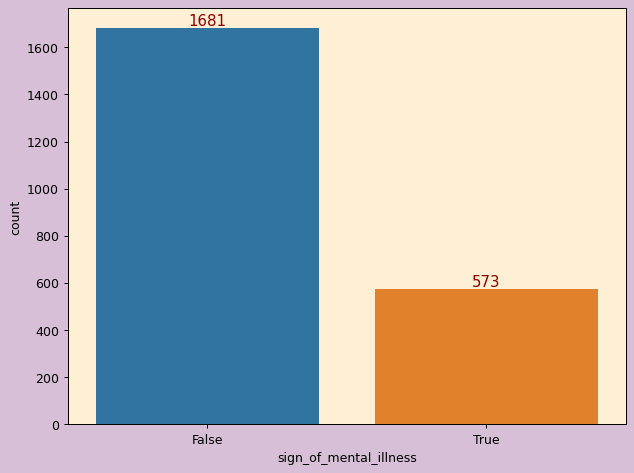

In [27]:
fig, ax = plt.subplots(figsize=(8,6), facecolor="thistle", dpi = 90)
ax.set(facecolor  ="papayawhip")

sns.barplot(kill.signs_of_mental_illness.value_counts().index,
           kill.signs_of_mental_illness.value_counts().values)

ax.set_xlabel("sign_of_mental_illness")
ax.set_ylabel("count")

ax.bar_label(ax.containers[0], color = "darkred", size = 12);

## <p style="background-color:#18ffff; font-family:newtimeroman; color:#black; font-size:150%; text-align:center; border-radius:10px 10px;">Q5 - PLOT THE NUMBER OF THREAT TYPES</p>

In [28]:
tf = kill["threat_level"].value_counts()
tf

attack          1462
other            677
undetermined     115
Name: threat_level, dtype: int64

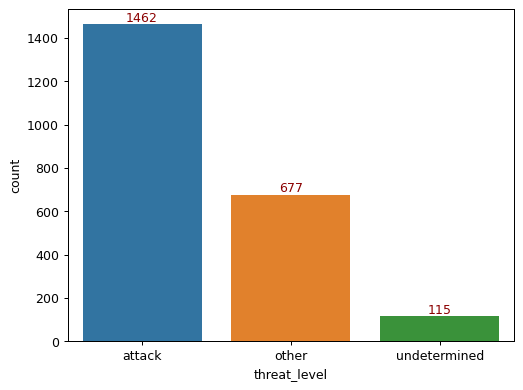

In [29]:
fig, ax = plt.subplots(dpi = 90)

sns.countplot(kill.threat_level)

ax.bar_label(ax.containers[0], color = "darkred", size = 10);

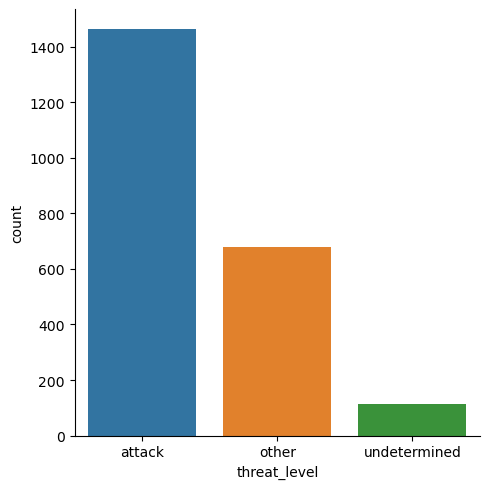

In [30]:
# with catplot:

sns.catplot(x="threat_level", data=kill, kind="count");

## Bonus

**if we want to see the bar labels as a percentage :**

In [31]:
pct = kill.threat_level.value_counts(normalize = True) * 100
pct 

attack          64.862467
other           30.035492
undetermined     5.102041
Name: threat_level, dtype: float64

In [32]:
pct.values

array([64.86246673, 30.03549246,  5.10204082])

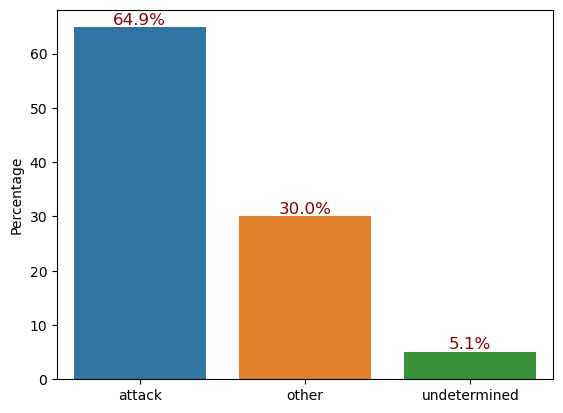

In [33]:
fig,ax = plt.subplots()
sns.barplot(x = pct.index,
           y = pct.values)

ax.bar_label(ax.containers[0], color = "darkred", size = 12, fmt='%.1f%%')
ax.set_ylabel("Percentage");

**if we want to transform the values of threat_level categories to 1, 2 and 3 :** 

In [34]:
dic = {"Python" : 1, "JavaScript" : 2, "Java" :3 }

In [35]:
pd.Series(["Python", "JavaScript", "Java", "Python"])

0        Python
1    JavaScript
2          Java
3        Python
dtype: object

In [36]:
# if we pass dictionary to map() function and apply it to the Series :

pd.Series(["Python", "JavaScript", "Java", "Python"]).map(dic)

# or
# pd.Series(["Python", "JavaScript", "Java", "Python"]).map({"Python" : 1, "JavaScript" : 2, "Java" :3 })

0    1
1    2
2    3
3    1
dtype: int64

In [37]:
# let's transform "threat_level" values using the same way:

my_dict = {"attack" :1, "undetermined" : 2, "other" :3}

kill["threat_type"] = kill["threat_level"].map(my_dict)

kill.sample(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,threat_type
349,437,Kelvin Goldston,11/05/15,shot,vehicle,30.0,M,B,Fort Worth,TX,False,attack,Car,False,1
306,409,Hector Morejon,23/04/15,shot,unarmed,19.0,M,H,Long Beach,CA,False,other,Not fleeing,False,3
1707,1912,Leeland White,26/09/16,shot,gun,32.0,M,W,Little Rock,AR,True,other,Not fleeing,False,3
829,975,James Covington,02/11/15,shot,gun,62.0,M,B,Washington,DC,False,attack,Car,False,1
1311,1840,David Shane Anderson,27/04/16,shot,gun,36.0,M,W,Milcreek,UT,False,attack,Not fleeing,False,1
427,543,Fritz Severe,11/06/15,shot,undetermined,46.0,M,B,Miami,FL,False,other,Not fleeing,False,3
803,947,Juan Ulloa,24/10/15,shot,gun,34.0,M,H,Highgrove,CA,False,attack,Not fleeing,False,1
445,582,Alfontish Cockerham,20/06/15,shot,gun,23.0,M,B,Chicago,IL,False,attack,Foot,False,1
1279,1460,Jeffrey Gray Wise,13/04/16,shot,gun,52.0,M,W,Llano,TX,False,attack,Not fleeing,False,1
1498,1681,Anthony Nunez,04/07/16,shot,gun,18.0,M,H,San Jose,CA,True,other,Not fleeing,False,3


## <p style="background-color:#18ffff; font-family:newtimeroman; color:black; font-size:150%; text-align:center; border-radius:10px 10px;">Q6 - PLOT THE NUMBER OF FLEE TYPES</p>

In [38]:
flee_freq = kill.flee.value_counts()
flee_freq

Not fleeing    1528
Car             360
Foot            278
Other            88
Name: flee, dtype: int64

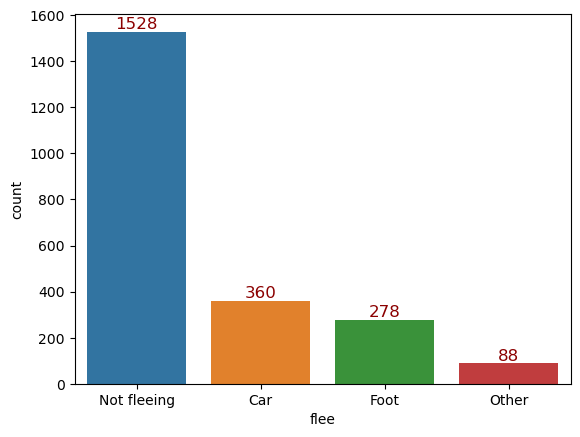

In [39]:
ax = sns.countplot(kill.flee)

ax.bar_label(ax.containers[0], color = "darkred", size = 12);

## Bonus

**plot two boxplot after define two axes as ax1 and ax2  
watch out for 'tuple unpacking'!**

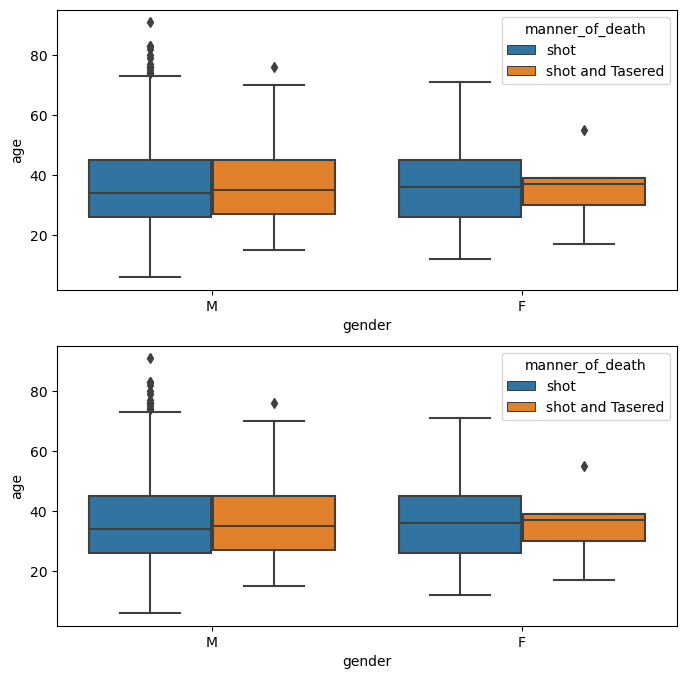

In [40]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize=(8,8))

sns.boxplot(x = kill.gender, y=kill.age, hue=kill.manner_of_death, ax = ax1)
sns.boxplot(x = kill.gender, y=kill.age, hue=kill.manner_of_death, ax = ax2);

## Some other parameters in boxplot

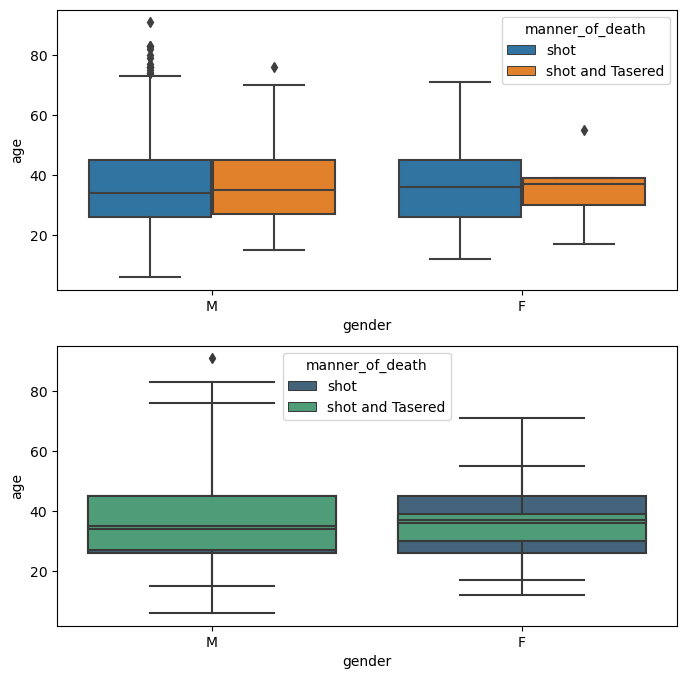

In [41]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8,8))  

sns.boxplot(x = kill.gender, y = kill.age, hue=kill.manner_of_death, ax=ax1) 

sns.boxplot(x = kill.gender, y = kill.age, hue=kill.manner_of_death, 
            # color="r",  
            palette = "viridis",  
            saturation=0.6, 
            width = 0.8,  
            whis = 2,   
            dodge = False, 
            ax=ax2);

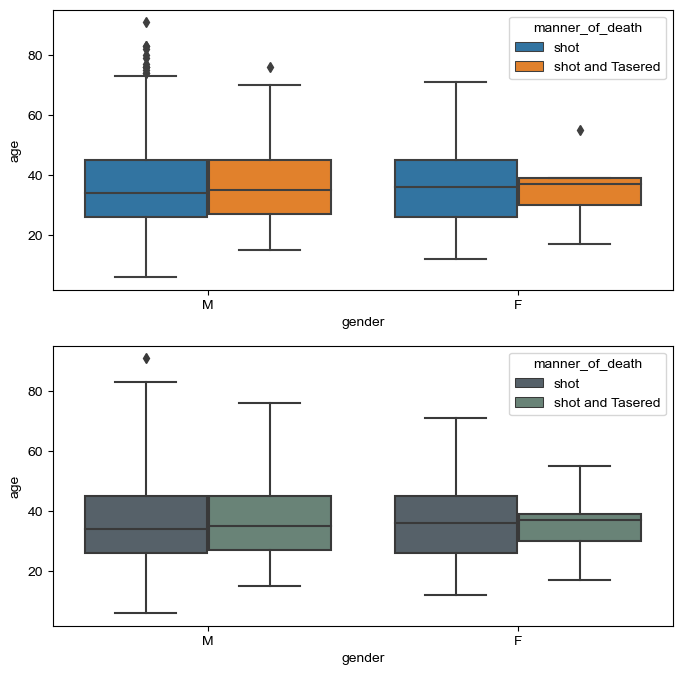

In [42]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8,8))  

sns.boxplot(x = kill.gender, y = kill.age, hue=kill.manner_of_death, ax=ax1) 

sns.boxplot(x = kill.gender, y = kill.age, 
            hue=kill.manner_of_death, 
            palette = "viridis",  
            saturation=0.2, 
            width = 0.8,  
            whis = 2,  
            dodge = True, 
            ax=ax2)

# can change the theme:
sns.set_theme(context='notebook',  # { notebook, paper, talk, poster.}  
            style='darkgrid', 
            palette='pastel', 
            font_scale=1.3);  